In [ ]:
from keras.datasets  import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

#### Visualize

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

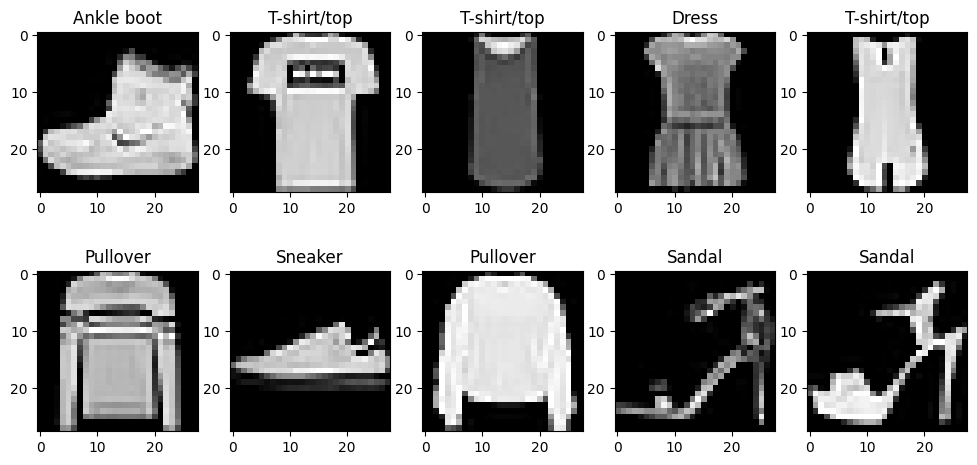

In [ ]:
plt.figure(figsize=(12,15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

#### Prepare dataset

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
x_train = x_train.reshape(-1,28,28,1).astype(float)/255 # Rows, Columns, Channels
x_test = x_test.reshape(-1,28,28,1).astype(float)/255 # Rows, Columns, Channels

#### Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, MaxPool2D, Flatten, Input, Dropout
from keras.optimizers import RMSprop

In [ ]:
model = Sequential()
# model.add(Input(shape=(28, 28)))
model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1)))
model.add(Activation('relu')) # 28x28
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1))) # 14x14

model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1)))
model.add(Activation('relu')) # 28x28

model.add(Flatten())
# model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax')) # output

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer = RMSprop(learning_rate=0.0001),
             metrics = ['accuracy'])

In [ ]:
model.fit(x=x_train,
         y=y_train_ohe,
         batch_size=1000,
         validation_data=(x_test, y_test_ohe),
         epochs = 20)

Epoch 1/20
60/60 [==============================] - 14s 232ms/step - loss: 1.9971 - accuracy: 0.5066 - val_loss: 1.6609 - val_accuracy: 0.6781
Epoch 2/20
51/60 [========================>.....] - ETA: 1s - loss: 1.3941 - accuracy: 0.7004

In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

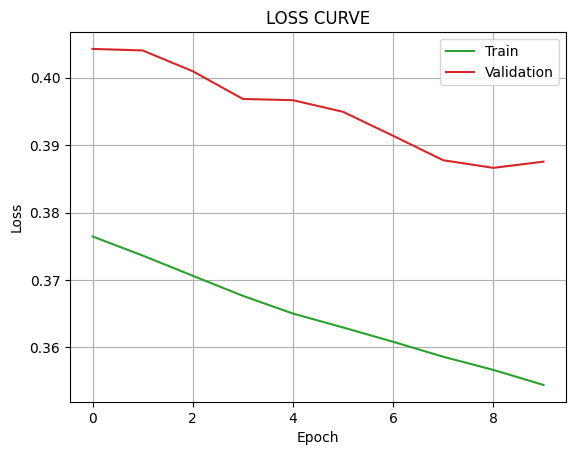

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

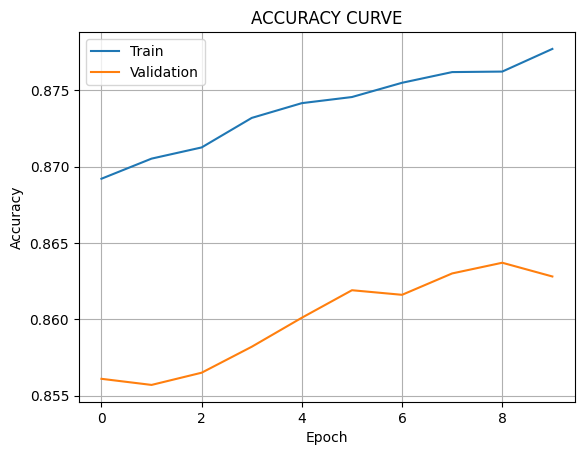

In [ ]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()